<a href="https://colab.research.google.com/github/mousa-rashdan/a1/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

In [6]:
data_path = 'Ecommerce_Sales_Prediction_Dataset(1).csv'
df = pd.read_csv('/content/Ecommerce_Sales_Prediction_Dataset(1).csv')

In [9]:

pd.set_option('display.max_columns', None)


df.head(10)



,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
5,06-01-2023,Fashion,161.01,36.88,Premium,5053.56,27
6,07-01-2023,Home Decor,580.53,17.66,Occasional,6939.75,30
7,08-01-2023,Home Decor,610.65,14.83,Regular,7001.64,27
8,09-01-2023,Home Decor,429.89,17.49,Occasional,6521.53,32
9,10-01-2023,Toys,739.08,38.73,Regular,2825.35,28


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [11]:
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


In [12]:
df.isnull().sum()

,0
Date,0
Product_Category,0
Price,0
Discount,0
Customer_Segment,0
Marketing_Spend,0
Units_Sold,0


In [13]:
df.nunique()

,0
Date,1000
Product_Category,5
Price,992
Discount,907
Customer_Segment,3
Marketing_Spend,1000
Units_Sold,42


In [7]:
df.fillna(df.median(numeric_only=True), inplace=True)

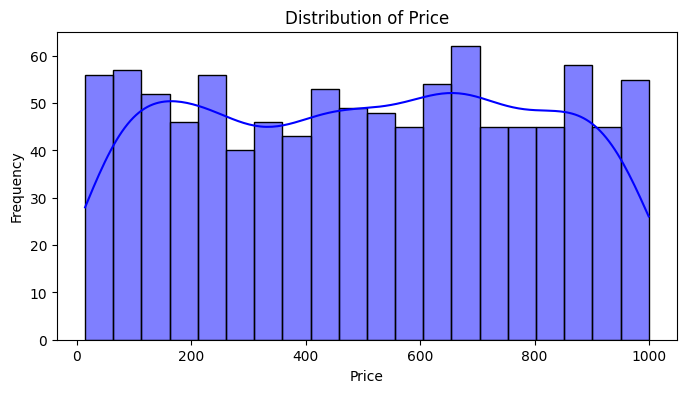

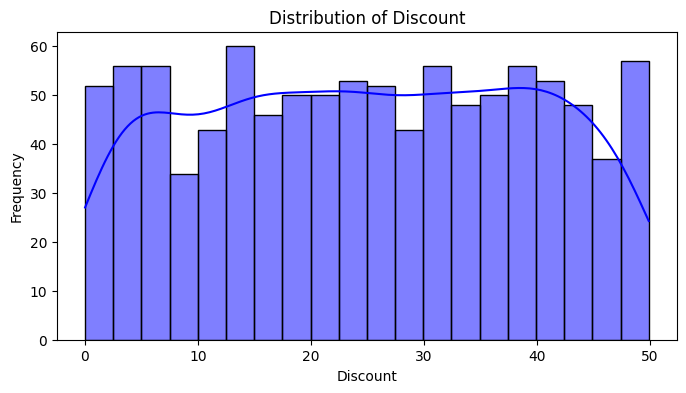

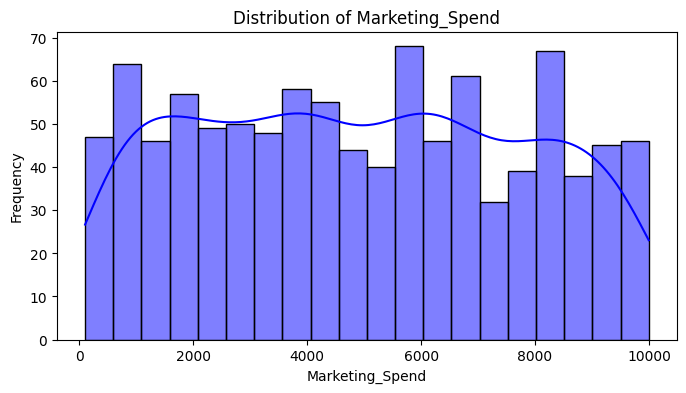

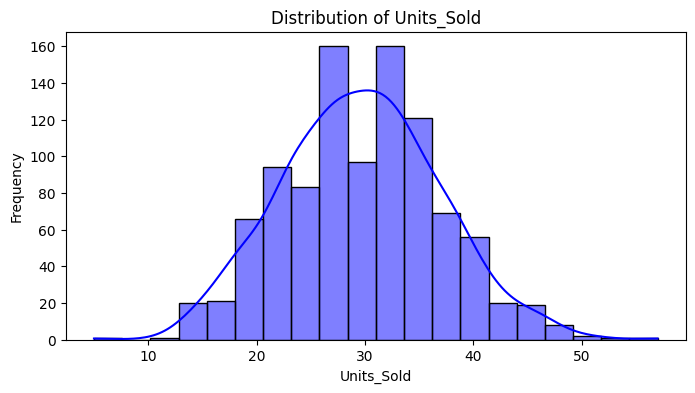

In [8]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

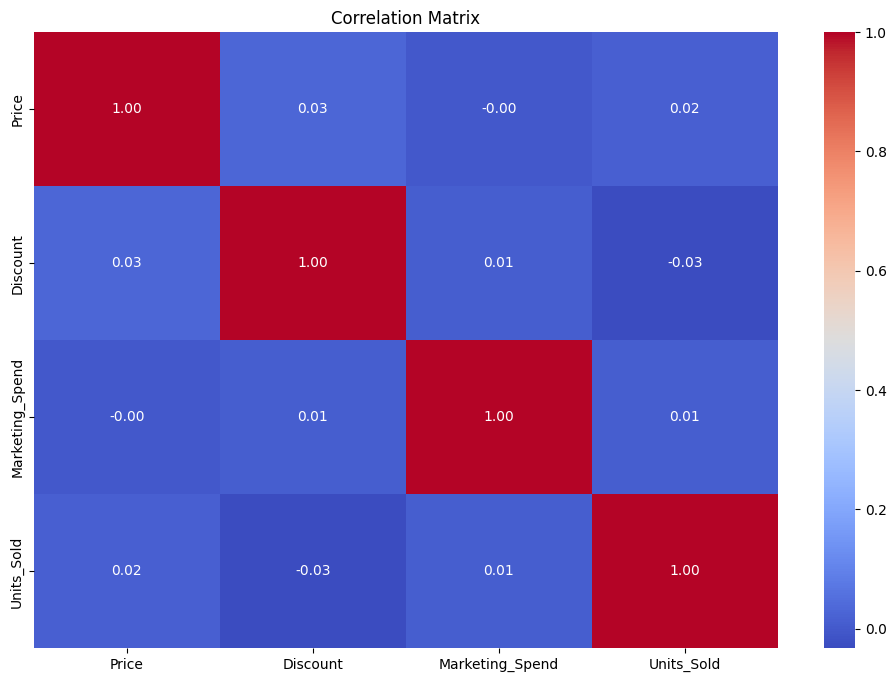

In [15]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

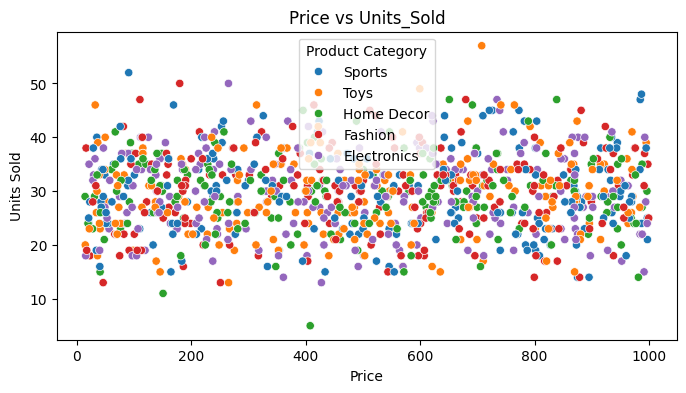

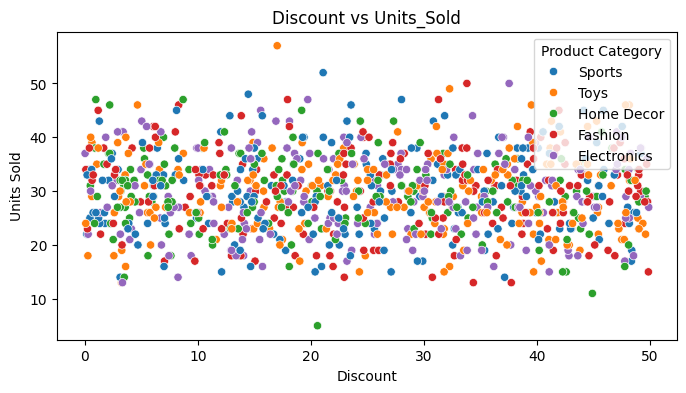

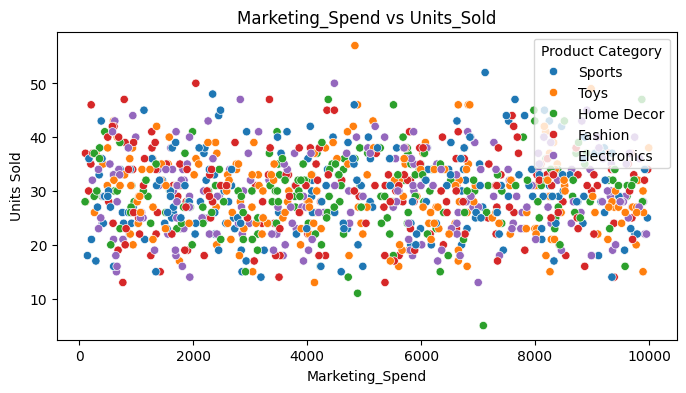

In [16]:
for col in ['Price', 'Discount', 'Marketing_Spend']:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y='Units_Sold', hue='Product_Category')
    plt.title(f'{col} vs Units_Sold')
    plt.xlabel(col)
    plt.ylabel('Units Sold')
    plt.legend(title='Product Category')
    plt.show()

<ipython-input-17-43f48d11479d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product_Category', y='Units_Sold', palette='Set3')


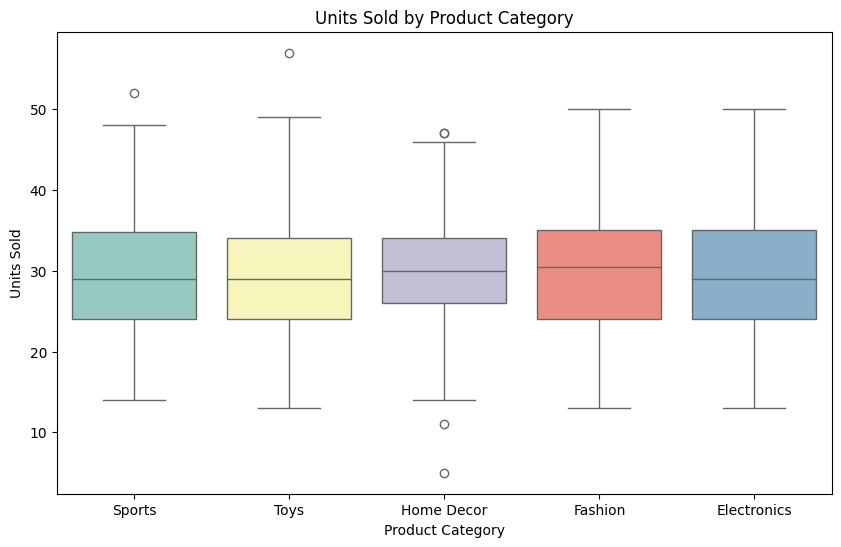

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product_Category', y='Units_Sold', palette='Set3')
plt.title('Units Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.show()

In [29]:
X = df.drop(columns='Units_Sold')
y = df['Units_Sold']

In [30]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)
X_processed = preprocessor.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print('x_train shape: ',X_train.shape)
print('x_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)


x_train shape:  (800, 1011)
x_test shape:  (200, 1011)
y_train shape:  (800,)
y_test shape:  (200,)


In [51]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

<800x1011 sparse matrix of type '<class 'numpy.float64'>'
	with 4800 stored elements in Compressed Sparse Row format>

In [53]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


In [54]:
keras_model = keras.models.Sequential([
    keras.layers.Dense(8, activation='linear'),
    keras.layers.Dense(128, activation='linear'),
    keras.layers.Dense(64, activation='linear'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [55]:
keras_model.compile(optimizer='adam', loss='mse', metrics=['mse'])


In [58]:
history = keras_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=500,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=10,
        monitor='val_loss',
        restore_best_weights=True
    )]
)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 484ms/step - loss: 904.5620 - mse: 904.5620 - val_loss: 867.2737 - val_mse: 867.2737
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 903.7421 - mse: 903.7421 - val_loss: 866.1036 - val_mse: 866.1036
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 907.4125 - mse: 907.4125 - val_loss: 864.8031 - val_mse: 864.8031
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 904.3638 - mse: 904.3638 - val_loss: 863.3572 - val_mse: 863.3572
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - loss: 895.1907 - mse: 895.1907 - val_loss: 861.7722 - val_mse: 861.7722
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step - loss: 898.4203 - mse: 898.4203 - val_loss: 860.0525 - val_mse: 860.0525
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 902.3778 - mse: 902.3778 - val_loss: 858.2406 - val_mse: 858.2406
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 894.7289 - mse: 894.7289 - val_loss: 856.3990 - val_mse: 856.3990
Epoch 9/

In [59]:
print(keras_model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 8)                   │           8,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,709 (205.90 KB)

 Trainable params: 17,569 (68.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,140 (137.27 KB)

None


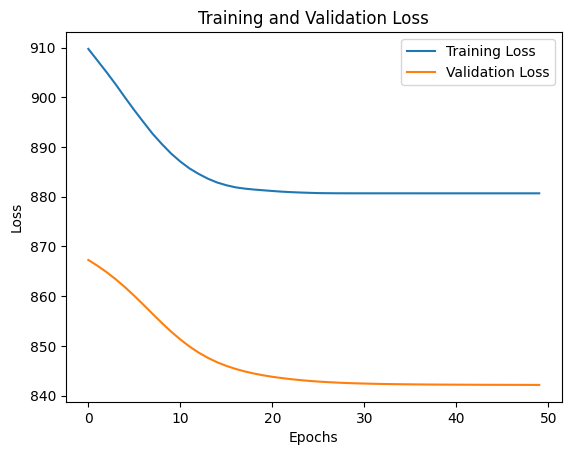

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [63]:
y_test

,Units_Sold
521,47
737,26
740,25
660,33
411,31
...,...
408,34
332,24
208,18
613,32


In [65]:
y_pred = keras_model.predict(X_test)
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.92513794],
       [0.9873747 ],
       [0.99257135],
       [0.96395165],
       [0.9782504 ],
       [0.94561094],
       [0.9814744 ],
       [0.93564695],
       [0.9582863 ],
       [0.97778344],
       [0.9613828 ],
       [0.97940385],
       [0.9928956 ],
       [0.95901304],
       [0.97885484],
       [0.9890313 ],
       [0.9876537 ],
       [0.9592459 ],
       [0.97369725],
       [0.9706862 ],
       [0.9868743 ],
       [0.8837136 ],
       [0.9882822 ],
       [0.961154  ],
       [0.9673633 ],
       [0.993725  ],
       [0.9573032 ],
       [0.9939355 ],
       [0.99079585],
       [0.9631631 ],
       [0.95095074],
       [0.9955725 ],
       [0.9772157 ],
       [0.8624328 ],
       [0.9427716 ],
       [0.99561614],
       [0.98903686],
       [0.996025  ],
       [0.96758986],
       [0.96633095],
       [0.99148   ],
       [0.9788959 ],
       [0.9493257 ],
       [0.9446112 ],
       [0.99650955],
       [0.97410095],
       [0.99153894],
       [0.966

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',root_mean_squared_error(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))

MAE:  28.072141647338867
MSE:  842.1431884765625
RMSE:  29.019702911376953
R2 score:  -14.571087837219238
